# Sentiment Analysis Demonstration

This notebook demonstrates the usage of the `SentimentAnalyzer` class for analyzing sentiment in news articles and social media about stocks.

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List, Any

# Add project root to path to allow imports
sys.path.append('../..')

from tumkwe_invest.data_analysis.sentiment_analysis import SentimentAnalyzer

## Initialize Sentiment Analyzer

We'll create analyzers using different model types for comparison.

In [2]:
# Initialize NLTK-based analyzer (fastest)
nltk_analyzer = SentimentAnalyzer(model_type="nltk")

# Note: The following may take some time to initialize as they download models
# Comment out if you want to focus only on nltk for faster execution

try:
    # Initialize Hugging Face transformer-based analyzer (more accurate but slower)
    hf_analyzer = SentimentAnalyzer(model_type="huggingface")
    
    # Initialize ensemble analyzer that combines both approaches
    ensemble_analyzer = SentimentAnalyzer(model_type="ensemble")
    
    all_models_available = True
except Exception as e:
    print(f"Error initializing advanced models: {e}")
    all_models_available = False

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Device set to use cuda:0


## Single Text Analysis

Let's analyze some sample financial news headlines and social media posts.

In [3]:
# Sample texts
sample_texts = [
    "Company XYZ reports record profits, stock soars 15%",
    "Market crash wipes out billions in value as investors panic",
    "Analysts remain neutral on ABC Corp despite missed earnings",
    "New product launch expected to boost revenue by Q3",
    "CEO under investigation for accounting irregularities"
]

# Analyze each sample text
results = []
for i, text in enumerate(sample_texts):
    nltk_result = nltk_analyzer.analyze_text(text)
    
    result = {
        "text": text,
        "nltk_sentiment": nltk_result["sentiment"],
        "nltk_confidence": nltk_result["confidence"],
    }
    
    # Add results from other models if available
    if all_models_available:
        hf_result = hf_analyzer.analyze_text(text)
        ensemble_result = ensemble_analyzer.analyze_text(text)
        
        result.update({
            "huggingface_sentiment": hf_result["sentiment"],
            "huggingface_confidence": hf_result["confidence"],
            "ensemble_sentiment": ensemble_result["sentiment"],
            "ensemble_confidence": ensemble_result["confidence"],
        })
    
    results.append(result)

# Display results in a dataframe
results_df = pd.DataFrame(results)
results_df

,text,nltk_sentiment,nltk_confidence,huggingface_sentiment,huggingface_confidence,ensemble_sentiment,ensemble_confidence
0,"Company XYZ reports record profits, stock soar...",positive,0.4404,positive,0.882508,positive,0.661454
1,Market crash wipes out billions in value as in...,negative,0.5574,negative,0.868036,negative,0.712718
2,Analysts remain neutral on ABC Corp despite mi...,positive,0.2235,negative,0.528778,negative,0.528778
3,New product launch expected to boost revenue b...,positive,0.4019,positive,0.953226,positive,0.677563
4,CEO under investigation for accounting irregul...,neutral,0.0000,negative,0.810663,negative,0.810663


## Text Preprocessing

Let's examine how the text preprocessing works.

In [4]:
# Sample text with elements that need preprocessing
raw_text = """Check out this new article about $TSLA at https://finance.example.com/tesla-surge! 
The stock is UP 5% today. <b>Analysts predict</b> further growth #bullish $$$"""

# Preprocess the text
processed_text = nltk_analyzer.preprocess_text(raw_text)

print("Raw text:")
print(raw_text)
print("\nProcessed text:")
print(processed_text)

Raw text:
Check out this new article about $TSLA at https://finance.example.com/tesla-surge! 
The stock is UP 5% today. <b>Analysts predict</b> further growth #bullish $$$

Processed text:
check out this new article about $tsla at the stock is up 5% today. analysts predict further growth bullish $$$


## Analyzing Multiple News Articles

Let's see how we can analyze a collection of news articles and social media posts.

In [5]:
# Sample news articles
news_articles = [
    {
        "title": "TechCorp Exceeds Q4 Earnings Expectations",
        "content": "TechCorp reported Q4 earnings of $1.25 per share, exceeding analyst expectations of $0.95 per share. Revenue grew by 18% year-over-year, driven by strong performance in cloud services and AI solutions. The company also announced a stock buyback program."
    },
    {
        "title": "GlobalBank Shares Drop After Fed Announcement",
        "content": "GlobalBank shares fell 3% following the Federal Reserve's announcement of increased capital requirements for large financial institutions. Analysts expect the new regulations to impact profit margins across the banking sector, with GlobalBank particularly exposed due to its recent expansion."
    },
    {
        "title": "RetailCorp Announces Store Closures",
        "content": "RetailCorp plans to close 50 underperforming stores nationwide as part of a restructuring initiative. The company expects the closures to result in $200 million in annual cost savings. While some analysts view this as a necessary step, others question the company's long-term strategy in the e-commerce era."
    },
    {
        "title": "PharmaCo's New Drug Receives FDA Approval",
        "content": "PharmaCo announced today that its breakthrough cancer treatment has received FDA approval. The drug, which showed a 40% improvement in patient outcomes during clinical trials, is expected to generate over $1 billion in annual sales. The company's stock jumped 12% on the news."
    }
]

# Sample social media posts
social_posts = [
    {"content": "Just bought more $TECH shares. Their new AI product is amazing! #bullish"},
    {"content": "$BANK is in serious trouble with these new regulations. Selling my position tomorrow. #bearish"},
    {"content": "$RETAIL closing stores is actually good for their bottom line. Smart move by management."},
    {"content": "$PHARMA approval was expected. Nothing special here, probably overvalued now."},
    {"content": "Market seems overextended. Moving to cash until we see a correction. #cautious"}
]

# Analyze all sources using NLTK analyzer (fastest)
all_results = nltk_analyzer.analyze_sources(news_articles, social_posts)

# Display results summary
print("Overall Sentiment Analysis Results:")
print(f"Dominant Sentiment: {all_results['overall']['dominant_sentiment']}")
print(f"Confidence: {all_results['overall']['confidence']:.2f}\n")

print("Sentiment Distribution:")
for sentiment, percentage in all_results['overall']['distribution'].items():
    print(f"{sentiment}: {percentage:.1f}%")

Overall Sentiment Analysis Results:
Dominant Sentiment: positive
Confidence: 0.44

Sentiment Distribution:
positive_percent: 66.7%
neutral_percent: 11.1%
negative_percent: 22.2%


## Visualizing Sentiment Results

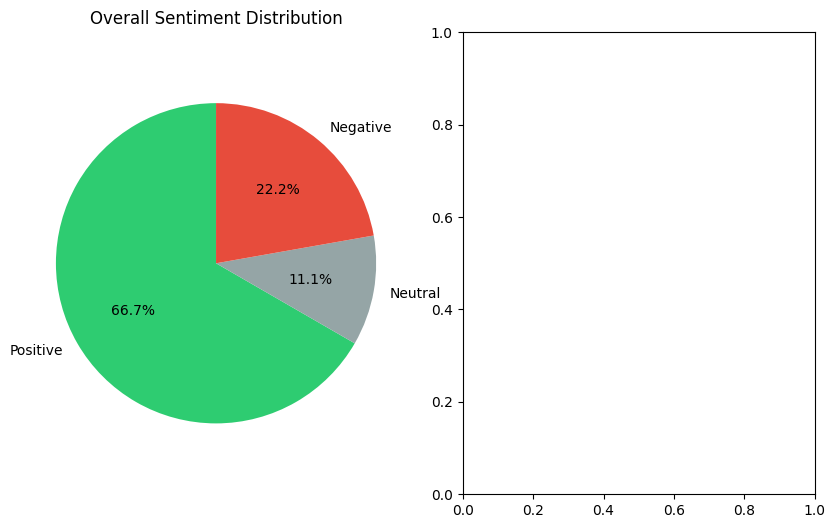

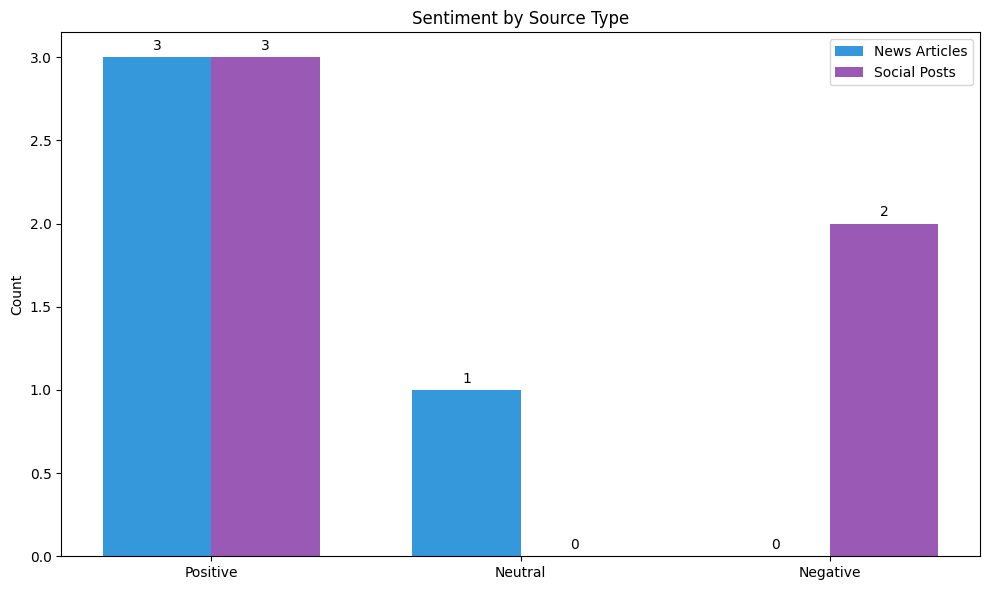

In [6]:
# Create sentiment visualization
plt.figure(figsize=(10, 6))

# Distribution pie chart
plt.subplot(1, 2, 1)
sentiment_labels = ['Positive', 'Neutral', 'Negative']
sentiment_values = [
    all_results['overall']['distribution']['positive_percent'],
    all_results['overall']['distribution']['neutral_percent'],
    all_results['overall']['distribution']['negative_percent']
]
colors = ['#2ecc71', '#95a5a6', '#e74c3c']
plt.pie(sentiment_values, labels=sentiment_labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Overall Sentiment Distribution')

# News vs social comparison bar chart
plt.subplot(1, 2, 2)
sentiment_counts = {
    'news': {'positive': 0, 'neutral': 0, 'negative': 0},
    'social': {'positive': 0, 'neutral': 0, 'negative': 0}
}

# Count sentiments for news articles
for article in all_results['news']:
    sentiment = article['combined_sentiment']
    sentiment_counts['news'][sentiment] += 1

# Count sentiments for social posts
for post in all_results['social']:
    sentiment = post['sentiment']
    sentiment_counts['social'][sentiment] += 1

# Create grouped bar chart
x = np.arange(3)
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

news_counts = [sentiment_counts['news']['positive'], 
               sentiment_counts['news']['neutral'], 
               sentiment_counts['news']['negative']]

social_counts = [sentiment_counts['social']['positive'], 
                 sentiment_counts['social']['neutral'], 
                 sentiment_counts['social']['negative']]

rects1 = ax.bar(x - width/2, news_counts, width, label='News Articles', color='#3498db')
rects2 = ax.bar(x + width/2, social_counts, width, label='Social Posts', color='#9b59b6')

ax.set_ylabel('Count')
ax.set_title('Sentiment by Source Type')
ax.set_xticks(x)
ax.set_xticklabels(['Positive', 'Neutral', 'Negative'])
ax.legend()

# Function to add labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

## Sentiment Validation

Validate the sentiment analyzer against a small labeled dataset.

In [7]:
# Small labeled test dataset
test_data = [
    {"text": "Profits are up by 25%, exceeding analyst expectations.", "label": "positive"},
    {"text": "The company is filing for bankruptcy protection.", "label": "negative"},
    {"text": "Trading volume was average today with minimal price movement.", "label": "neutral"},
    {"text": "Investors are increasingly optimistic about the company's growth prospects.", "label": "positive"},
    {"text": "Regulatory concerns continue to weigh on the stock price.", "label": "negative"},
    {"text": "The market awaits further guidance from the Federal Reserve.", "label": "neutral"},
    {"text": "New strategic partnership announced with major tech company.", "label": "positive"},
    {"text": "Job cuts and restructuring efforts are underway.", "label": "negative"},
    {"text": "The company met earnings estimates for Q2.", "label": "neutral"},
    {"text": "Revolutionary product outperforming competitors in initial sales.", "label": "positive"}
]

# Validate NLTK analyzer
nltk_validation = nltk_analyzer.validate_accuracy(test_data)

print("NLTK Analyzer Validation:")
print(f"Overall Accuracy: {nltk_validation['accuracy']:.2f}")

print("\nClass-specific metrics:")
for sentiment, metrics in nltk_validation['class_metrics'].items():
    print(f"  {sentiment.capitalize()}:")
    print(f"    Precision: {metrics['precision']:.2f}")
    print(f"    Recall: {metrics['recall']:.2f}")
    print(f"    F1 Score: {metrics['f1_score']:.2f}")

# Optionally validate other analyzers if available
if all_models_available:
    print("\nHugging Face Analyzer Validation:")
    hf_validation = hf_analyzer.validate_accuracy(test_data)
    print(f"Overall Accuracy: {hf_validation['accuracy']:.2f}")
    
    print("\nEnsemble Analyzer Validation:")
    ensemble_validation = ensemble_analyzer.validate_accuracy(test_data)
    print(f"Overall Accuracy: {ensemble_validation['accuracy']:.2f}")

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


NLTK Analyzer Validation:
Overall Accuracy: 0.50

Class-specific metrics:
  Positive:
    Precision: 0.50
    Recall: 0.33
    F1 Score: 0.40
  Negative:
    Precision: 1.00
    Recall: 0.17
    F1 Score: 0.29
  Neutral:
    Precision: 0.20
    Recall: 0.67
    F1 Score: 0.31

Hugging Face Analyzer Validation:
Overall Accuracy: 0.90

Ensemble Analyzer Validation:
Overall Accuracy: 0.90


## Conclusion

In this notebook, we've demonstrated how to use the SentimentAnalyzer class for:

1. Analyzing sentiment in individual financial texts
2. Processing and cleaning text data
3. Analyzing collections of news articles and social media posts
4. Visualizing sentiment distribution and comparing different sources
5. Validating sentiment analysis accuracy against labeled data

The sentiment analyzer can be used with different underlying models:
- NLTK's VADER (fast, rule-based approach good for short texts)
- Hugging Face transformers (more accurate but computationally intensive)
- Ensemble approach (combines both methods for better accuracy)

This analysis provides valuable insights into market sentiment that can complement technical and fundamental analysis for investment decisions.